In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7fa93974f860>


In [2]:
base_input = '../../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

['default_assoc', 1.0]
['A']
['M']
['B']
['S']
Parsing rule...
['A(a)+B(b)<->A(a!1).B(a!1)', '', 'G=-20']
['A', 'B', '']
['A(a)+B(b)', 'A(a!1).B(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(b)+M(a)<->A(b!1).M(a!1)', '', 'G=-20']
['A', 'M', '']
['A(b)+M(a)', 'A(b!1).M(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(c)+S(a)<->A(c!1).S(a!1)', '', 'G=-20']
['A', 'S', '']
['A(c)+S(a)', 'A(c!1).S(a!1)']
GGGGGGGGGgg
Parsing rule...
['B(b)+M(b)<->B(b!1).M(b!1)', '', 'G=-20']
['B', 'M', '']
['B(b)+M(b)', 'B(b!1).M(b!1)']
GGGGGGGGGgg
Parsing rule...
['M(c)+S(b)<->M(c!1).S(b!1)', '', 'G=-20']
['M', 'S', '']
['M(c)+S(b)', 'M(c!1).S(b!1)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7fa8a3cd70b8>, 'copies': tensor([100.], dtype=torch.float64)})
Node-2 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7fa8a3cd70b8>, 'copies': tensor([100.], dtype=torch.float64)})
-----
{'A'}
{'A'}
set()
Steric hindrance detected
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph obj

Node-2 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7fa8a4c6bc50>, 'copies': tensor([0.], dtype=torch.float64)})
-----
{'S', 'A'}
{'S', 'A'}
set()
Steric hindrance detected
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7fa8a4c6bc50>, 'copies': tensor([0.], dtype=torch.float64)})
Node-2 :  (7, {'struct': <networkx.classes.graph.Graph object at 0x7fa91a5ba470>, 'copies': tensor([0.], dtype=torch.float64)})
-----
{'S', 'A'}
{'B', 'M'}
{'S', 'A'}
False
Allowed edges: 
('A', 'B')
############################3
Allowed edges: 
('A', 'M')
############################3
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
############################3
[(13, {'struct': <networkx.classes.graph.Graph object at 0x7fa91a5e8828>, 'copies': tensor([0.], dtype=torch.float64)})]
Adding an new edge-- 6 13
New bonds:  [('A', 'B'), ('A', 'M'), ('M', 'S')]
Adding an new edge-- 7 13
The number of bonds formed are not compensated by the number of 

In [3]:
uid_dict = {}
react_dict = {}
sys.path.append("../../")
nodes_list = []
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n,"--",gtostr(rn.network.nodes[n]['struct']))
    nodes_list.append(gtostr(rn.network.nodes[n]['struct']))
    for r_set in rn.get_reactant_sets(n):
        r_tup = tuple(list(r_set)+[n])
#         print(r_tup)
        data = rn.network.get_edge_data(r_tup[0], n)
        reaction_id = data['uid']
        react_dict[r_tup]=reaction_id
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = ("".join(r1),"".join(r2))
#         print(reactants)
        uid_dict[(n,k)] = uid
#         react_dict[reactants] = uid

print(uid_dict)
print(react_dict)

0 -- A
1 -- M
2 -- B
3 -- S
4 -- AM
5 -- AB
6 -- AS
7 -- BM
8 -- MS
9 -- ABM
10 -- AMS
11 -- ABS
12 -- BMS
13 -- ABMS
{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 17, (0, 10): 18, (0, 13): 20, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 19, (2, 5): 1, (2, 7): 3, (2, 9): 7, (2, 11): 8, (2, 12): 9, (2, 13): 10, (3, 6): 2, (3, 8): 4, (3, 10): 11, (3, 11): 12, (3, 12): 13, (3, 13): 14, (4, 9): 7, (4, 10): 11, (5, 9): 5, (5, 11): 12, (5, 13): 15, (6, 10): 6, (6, 11): 8, (6, 13): 16, (7, 12): 13, (7, 13): 16, (7, 9): 17, (8, 12): 9, (8, 13): 15, (8, 10): 18, (9, 13): 14, (10, 13): 10, (11, 13): 19, (12, 13): 20}
{(0, 1, 4): 0, (0, 2, 5): 1, (0, 3, 6): 2, (1, 2, 7): 3, (1, 3, 8): 4, (1, 5, 9): 5, (2, 4, 9): 7, (0, 7, 9): 17, (3, 4, 10): 11, (1, 6, 10): 6, (8, 0, 10): 18, (2, 6, 11): 8, (3, 5, 11): 12, (3, 7, 12): 13, (8, 2, 12): 9, (9, 3, 13): 14, (8, 5, 13): 15, (0, 12, 13): 20, (1, 11, 13): 19, (10, 2, 13): 10, (6, 7, 13): 16}


In [4]:
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
#new_kon = [0.2244, 0.2244, 0.2255, 1.6039, 1.6039, 1.6040] # M-1 s-1   
#new_kon = [0.0125, 0.1947, 0.0125, 3.6241, 3.4263, 3.4258] #Max yield Simruntime = 10sec
# new_kon = new_kon + Tensor([1.]*np.array(1e0))
# new_kon[7]=1e-6
# new_kon = new_kon + Tensor([0.0158, 4.8523, 4.8524, 4.8517, 4.8521, 0.0122, 0.0122, 1.4120, 3.8928,
#         3.8763, 3.7180, 1.3986, 3.8942, 3.8792, 3.7292, 1.6763, 1.6764, 0.0111,
#         0.0111, 3.4412, 3.4471])
# new_kon = new_kon + Tensor([0.1500, 5.7619, 5.7887, 5.7685, 5.7934, 0.0162, 0.0171, 1.1242, 4.8607,
#                             4.8561, 6.4445, 1.1185, 4.8608, 4.8562, 6.4342, 0.4273, 0.4490, 0.0177,
#                             0.0169, 4.9485, 4.9159]) #5sec opti time

new_kon = new_kon + Tensor([0.0101, 4.9091, 4.9091, 4.9049, 4.9044, 0.0146, 0.0145, 4.4233, 4.8614,
        4.8579, 6.7328, 4.4090, 4.8596, 4.8564, 6.7438, 4.5641, 4.5641, 0.0164,
        0.0163, 4.2838, 4.3043]) #1sec opti time
                            
# new_kon = new_kon + Tensor([0.01500, 0.016, 0.016, 0.016, 0.016, 1.0, 1.0, 1.0, 1.0,
#                             1.0, 10.0, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0, 1.0,
#                             1.0, 10.0, 10.0])

# new_kon = new_kon + Tensor([4.8587, 4.9136, 4.8577, 4.9425, 4.8712, 0.0129, 0.0248, 4.9163, 0.0146,
#         0.0138, 0.0175, 7.2391, 0.0179, 0.0115, 0.0165, 7.8065, 7.1411, 7.1320,
#         7.1691, 0.0134, 0.0200, 0.0111, 0.0114, 7.7209, 7.8547])   #Optim rates with BS bond
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 17}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 18}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 5}
{'k_on'

In [5]:
vec_rn = VectorizedRxnNet(rn, dev='cpu')
vec_rn.reset()
# print(vec_rn.kon)
runtime =100
sim = VecSim(vec_rn, runtime, device='cpu',calc_flux=True)
y = sim.simulate()

A
Reactant Sets:
M
Reactant Sets:
B
Reactant Sets:
S
Reactant Sets:
AM
Reactant Sets:
(0, 1)
AB
Reactant Sets:
(0, 2)
AS
Reactant Sets:
(0, 3)
BM
Reactant Sets:
(1, 2)
MS
Reactant Sets:
(1, 3)
ABM
Reactant Sets:
(1, 5)
(2, 4)
(0, 7)
AMS
Reactant Sets:
(3, 4)
(1, 6)
(8, 0)
ABS
Reactant Sets:
(2, 6)
(3, 5)
BMS
Reactant Sets:
(3, 7)
(8, 2)
ABMS
Reactant Sets:
(9, 3)
(8, 5)
(0, 12)
(1, 11)
(10, 2)
(6, 7)
tensor([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0., -1., -1.,  0., -1.,  1.,  1.,  1., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,  1., -0.,  1.],
        [-1.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., -1.,  0.,  1., -0., -0.,  1.,  1.,  1.,  1.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1., -0.],
        [ 0., -1.,  0., -1.,  0.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0

Current time:  tensor(0.0005, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0

Current time:  tensor(0.0029, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0029, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0030, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0030, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0031, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0031, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0032, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0032, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0033, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0033, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0034, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0034, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0035, dtype=torch.float64, grad_fn=<AddBackward0>)
Current time:  tensor(0.0

<IPython.core.display.Javascript object>


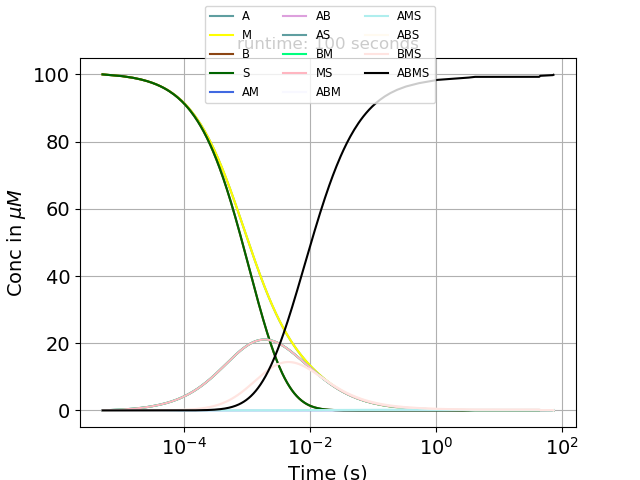

In [9]:
from matplotlib import pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
# nodes_list = ['A','B','M','S','AB','AM','AS','MS','BM','ABM','AMS','ABS','BMS','ABMS']
# nodes_list_repeat = ['A','B','S','AB','AS','AA','BS','ABS','AAB','AAS','AABS']
sim.plot_observable(nodes_list, ax=ax,legend=False,seed=198)
ax.set_title("runtime: " + str(runtime) + " seconds")
handles,labels = ax.get_legend_handles_labels()
ax.set_xscale("log")
fig.legend(handles,nodes_list,loc='upper center',fancybox=True,ncol=3,fontsize='small',markerscale=1.0)
ax.grid(which="major",axis="both")

<IPython.core.display.Javascript object>


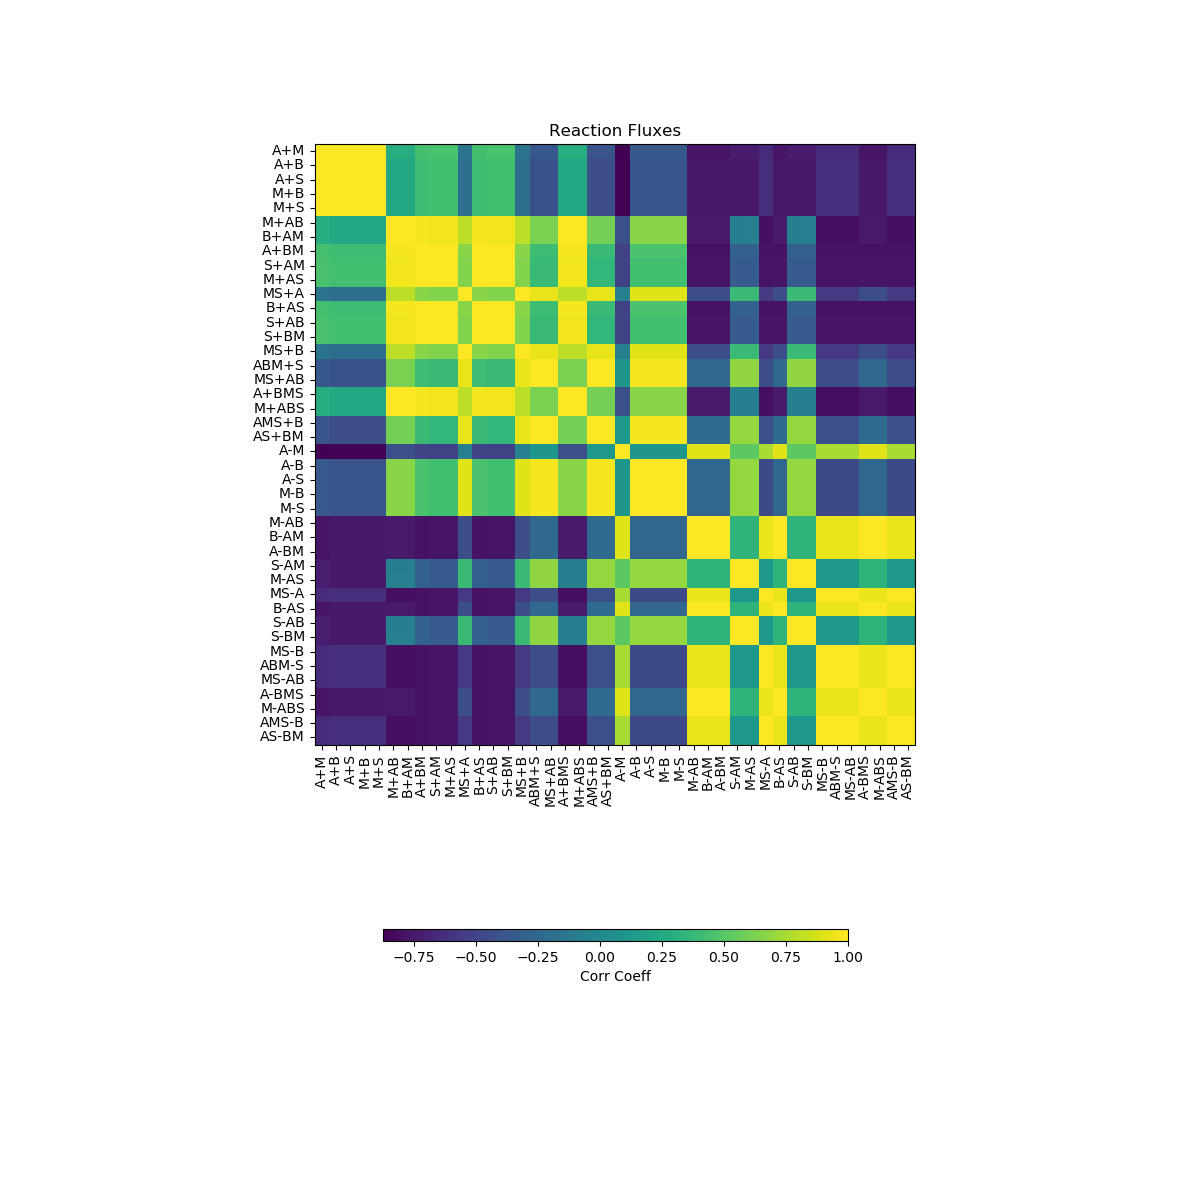

Text(0.5, 1.0, 'Reaction Fluxes')

In [7]:
#Calculating chemical potential and fluxes
#Calculating correlation b/w fluxes
def corr_matrix(M):
    return(np.corrcoef(M))


flux_corr_matrix = corr_matrix(np.transpose(sim.uid_flux.detach().numpy()))
# print(np.transpose(sim.uid_flux.detach().numpy()))

%matplotlib notebook
fig_c,ax_c = plt.subplots(figsize=(12,12))
hm = ax_c.imshow(flux_corr_matrix)


fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_c.set_xticks(np.arange(len(ax_labels)))
ax_c.set_yticks(np.arange(len(ax_labels)))
ax_c.set_xticklabels(ax_labels)
ax_c.set_yticklabels(ax_labels)
plt.setp(ax_c.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_c.get_yticklabels(),va='center',fontsize=10)
fig_c.colorbar(hm,ax=ax_c,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)
# ax_c.grid()

for i in range(len(ax_labels)):
    for j in range(len(ax_labels)):
#         print(ax_labels[j],ax_labels[i])
        ax.text(1.0,1.0,flux_corr_matrix[i,j],ha="center", va="center", color="w",transform=ax.transAxes)
fig.tight_layout()
plt.show()
label = "Reaction Fluxes"
ax_c.set_title(label)

<IPython.core.display.Javascript object>


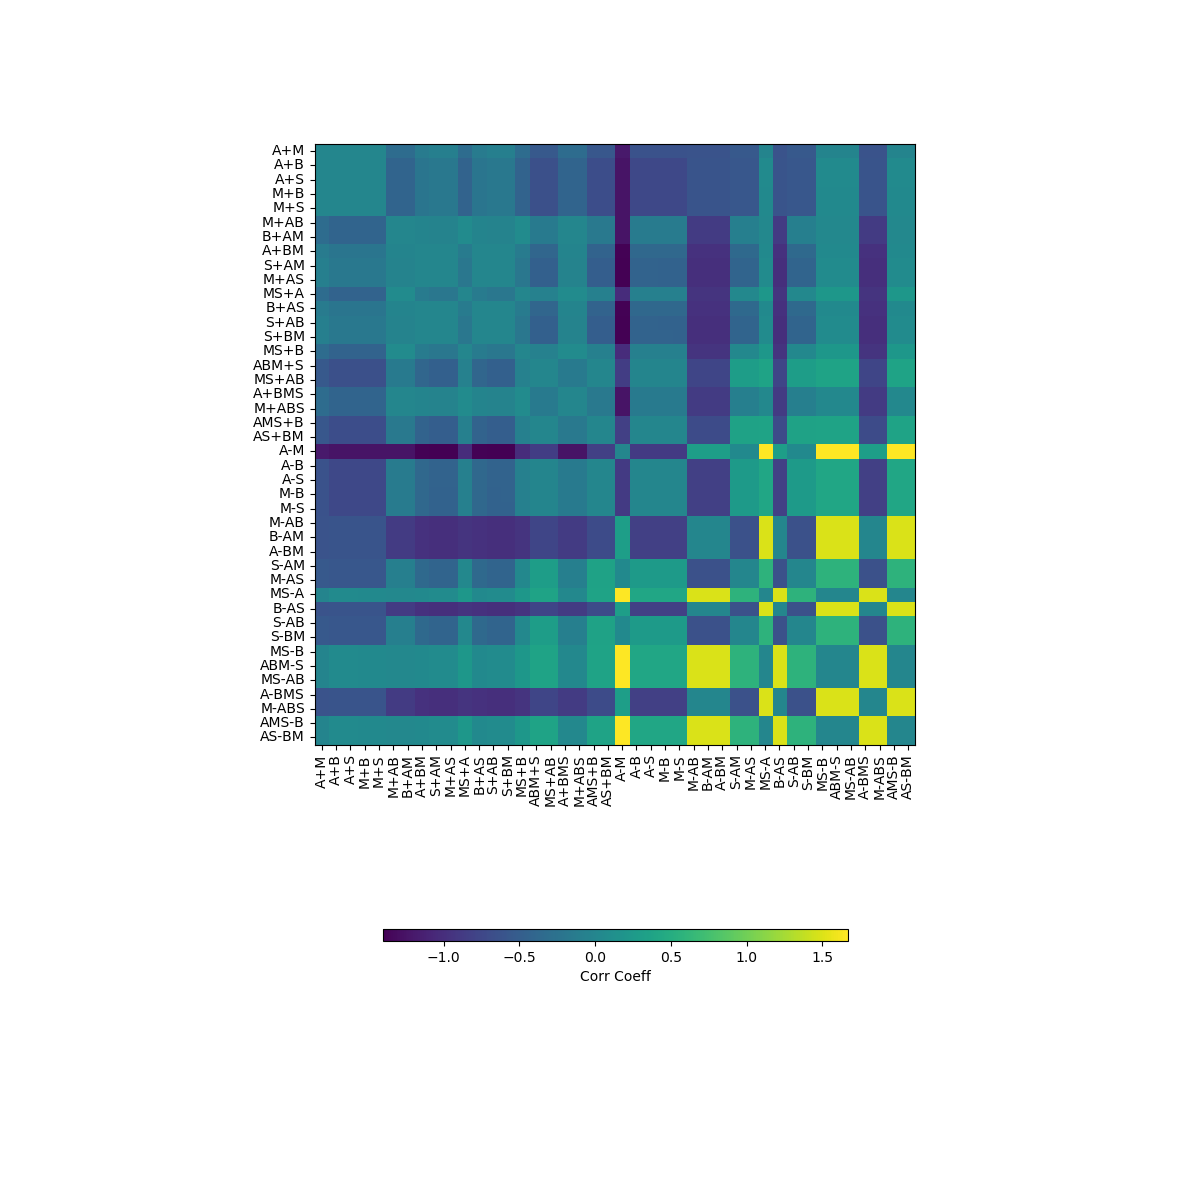

In [10]:
import pickle
import os
pick_path = "./correlation_matrix_reference.pickle"
ref_corr_matrix=np.zeros((2,2))
if os.path.exists(pick_path):
    with open(pick_path,'rb') as pick_handle:
        ref_corr_matrix = pickle.load(pick_handle)
else:
    with open(pick_path,"wb") as pick_handle2:
        pickle.dump(flux_corr_matrix,pick_handle2)

if ref_corr_matrix.all() !=0:
    diff_matrix = flux_corr_matrix-ref_corr_matrix
    fig_diff,ax_diff = plt.subplots(figsize=(12,12))
    hm = ax_diff.imshow(diff_matrix)
    
    fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
    rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
    ax_labels = fw_labels+rw_labels
    ax_diff.set_xticks(np.arange(len(ax_labels)))
    ax_diff.set_yticks(np.arange(len(ax_labels)))
    ax_diff.set_xticklabels(ax_labels)
    ax_diff.set_yticklabels(ax_labels)
    plt.setp(ax_diff.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
    plt.setp(ax_diff.get_yticklabels(),va='center',fontsize=10)
    fig_diff.colorbar(hm,ax=ax_diff,aspect=40,label="Corr Coeff",orientation='horizontal',panchor=(0.5,0.0),pad=0.2,shrink=0.5)

In [11]:
flux_data=sim.uid_flux.detach().numpy()[:-1,:]

<IPython.core.display.Javascript object>


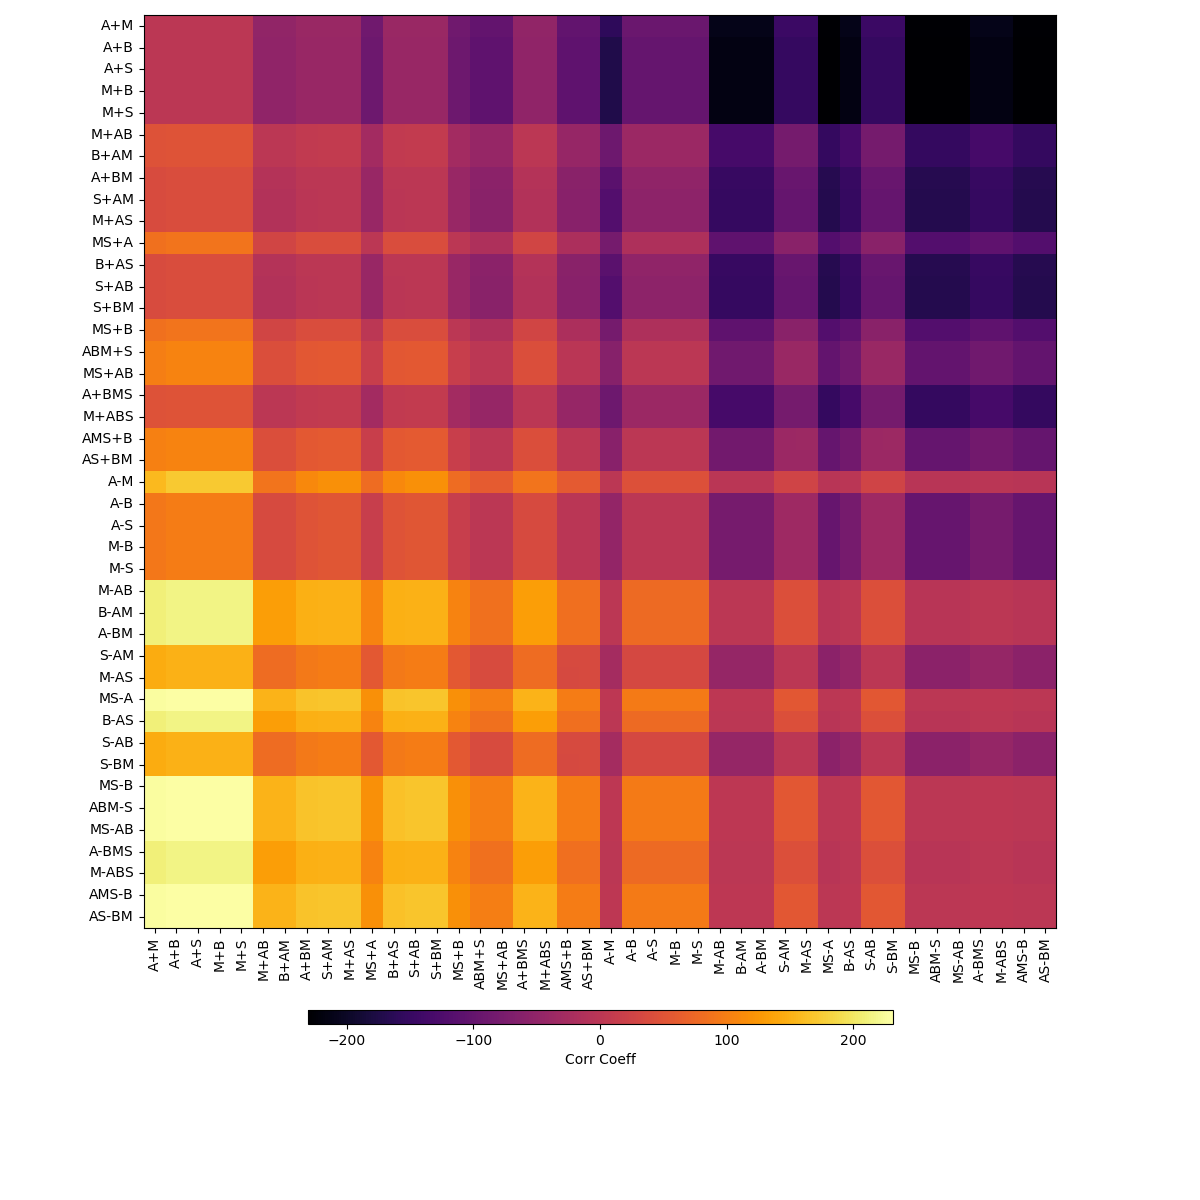

In [12]:
#Calculate lag between diff fluxes
from scipy import signal
def calc_lag(x,y):
    corr_array = signal.correlate(x,y,mode='full')
#     lags = signal.correlation_lags(x.size, y.size, mode="full")
#     lag = lags[np.argmax(corr_array)]
#     np_corr_array = np.correlate(x,y,mode='full')
    lag1 = np.argmax(corr_array)-np.floor(corr_array.shape[0]/2)
    corr_coeff = np.corrcoef(x,y,rowvar=False)
    
#     print(corr_array)
#     print(np_corr_array)
#     print(corr_coeff)
#     print("Lag time: ",lag1)
    return(lag1)
    

lag_matrix = np.zeros((flux_data.shape[1],flux_data.shape[1]))
# coeff_matrix = np.zeros(flux_data.shape)
for i in range(flux_data.shape[1]):
    x=flux_data[:,i]
    for j in range(flux_data.shape[1]):
        y=flux_data[:,j]
        lag_matrix[i,j]=calc_lag(x,y)
        

fig_l,ax_l = plt.subplots(figsize=(12,12))
hm = ax_l.imshow(lag_matrix,cmap='inferno')
# fw_labels=list(react_dict.values())
# rw_labels=['-'+str(l) for l in fw_labels]
# ax_labels = fw_labels+rw_labels
fw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'+'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
rw_labels=[gtostr(rn.network.nodes[tup[0]]['struct'])+'-'+gtostr(rn.network.nodes[tup[1]]['struct']) for tup in list(react_dict.keys())]
ax_labels = fw_labels+rw_labels
ax_l.set_xticks(np.arange(len(ax_labels)))
ax_l.set_yticks(np.arange(len(ax_labels)))
ax_l.set_xticklabels(ax_labels)
ax_l.set_yticklabels(ax_labels)
plt.setp(ax_l.get_xticklabels(),rotation=90, ha='center',fontsize=10,va='top')
plt.setp(ax_l.get_yticklabels(),va='center',fontsize=10)
fig_l.colorbar(hm,ax=ax_l,aspect=40,label="Corr Coeff",orientation='horizontal',pad=0.07,shrink=0.5)
fig_l.tight_layout()
    

In [20]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1e6])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'ABS': 11, 'BMS': 12, 'ABMS': 13}
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  A + M  ->  AM
Net flux:  tensor([0.0160], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.0101, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([10011.4417], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': tensor(0.0101, dtype=torch.float64, grad_fn=<SelectBackward>), 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
Reaction:  A + B  ->  AB
Net flux:  tensor([-0.0010], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(4.9091, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([4866056.2919], dtype=tor

koff:  tensor([6615249.2664], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': tensor(6.7328, dtype=torch.float64, grad_fn=<SelectBackward>), 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 10}
|                                                                             |
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  S + A  ->  AS
Net flux:  tensor([-0.0009], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(4.9091, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([4866056.2919], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD:

koff:  tensor([14345.0926], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': tensor(0.0146, dtype=torch.float64, grad_fn=<SelectBackward>), 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 5}
Reaction:  ABM  ->  B + AM
Net flux:  tensor([-113572.8318], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(4.4233, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([4346071.7799], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': tensor(4.4233, dtype=torch.float64, grad_fn=<SelectBackward>), 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 7}
Reaction:  ABM  ->  BM + A
Net flux:  tensor([-421.0871], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(0.0164, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([16113.6656], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': tensor(0.0164, dtype=torch.float64, grad_fn=<S

In [14]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

tensor([7.2251e-03, 6.1385e-03, 2.7986e-02, 2.6568e-02, 1.5952e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6132e-02, 2.7323e-02, 0.0000e+00,
        0.0000e+00, 9.9996e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
Parameter containing:
tensor([0.0101, 4.9091, 4.9091, 4.9049, 4.9044, 0.0146, 0.0145, 4.4233, 4.8614,
        4.8579, 6.7328, 4.4090, 4.8596, 4.8564, 6.7438, 4.5641, 4.5641, 0.0164,
        0.0163, 4.2838, 4.3043], dtype=torch.float64, requires_grad=True)


In [15]:
# for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#     print(k," : ", v.item())

In [16]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
# nx.draw_networkx(rn.network,labels=labels,node_size=1000)

<IPython.core.display.Javascript object>


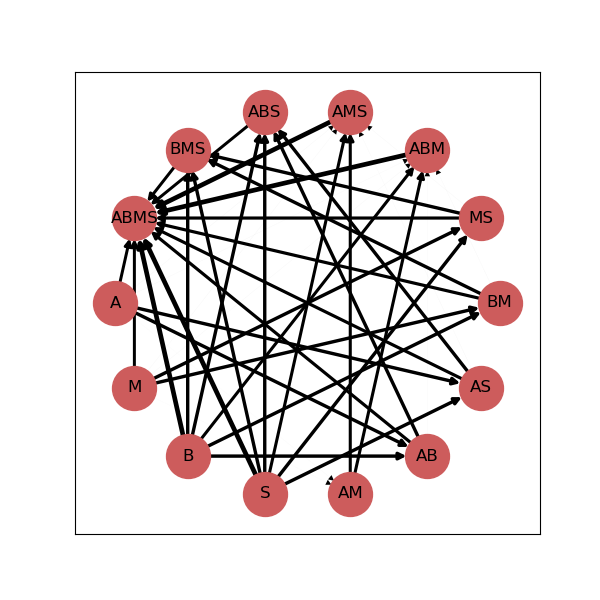

In [17]:
fig,ax = plt.subplots(figsize=(6,6))
sl_pos = nx.shell_layout(rn.network)
nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax,edgelist=[])
# new_kon = 0.5*np.array([0.8179, 0.8172, 0.8174, 0.8174, 0.8218, 0.0296, 0.0295, 4.6052, 0.8188,
#         0.8188, 7.7299, 5.4280, 0.8199, 0.8183, 7.1332, 4.9835, 4.9838, 0.0307,
#         0.0315, 5.2260, 5.2278])

if vec_rn.rxn_coupling:
    label_kon = 0.5*sim.coupled_kon.detach().numpy()
else:
    label_kon = 0.5*vec_rn.kon.detach().numpy()
    
sample_colors = ['black','black','black','black','olivedrab','orchid','darkorange','teal','']
edge_widths = []
edge_colors= []
for edge,uid in uid_dict.items():
    edge_widths.append(label_kon[uid])
    #edge_colors.append(sample_colors[uid])
nx.draw_networkx_edges(rn.network,pos=sl_pos,width=edge_widths,label=edge_widths,arrowsize=10,min_target_margin=15.0)


In [18]:
# fig,ax = plt.subplots(figsize=(6,6))
# nx.draw_networkx(rn.network,pos=sl_pos,labels=labels,node_size=1000,node_color='indianred',ax=ax)

In [19]:

poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

TypeError: unsupported operand type(s) for *: 'Symbol' and 'NoneType'